Importing Dependencies


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
%matplotlib inline

#Dataset
### Pima Diabetes Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. All patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes - 
1. Number of pregnancies 
2. Glucose
3. Blood Pressure 
4. Skin Thickness 
5. Insulin
6. DiabetesPedigreeFunction
7. Age
8. BMI

In [116]:
#Loading the dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####Basic EDA Exploratory Data Analysis

In [117]:
# information about datatype, Null Value Counts, memory usage
diabetes_dataset.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
# basic statistic details about data (.T to transpose the table)
diabetes_dataset.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


####Analysis-
Upon checking out above table we see that minimum values for -
1. Glucose, 
2. BloodPressure, 
3. SkinThickness, 
4. Insulin, 
5. BMI 

is zero which is invalid.
This indicates that some values in these 5 columns are missing.

Converting these 0's to NaN for further analysis 


In [119]:
# Making changes in a copy of the orignal dataframe
diabetes_dataset_copy = diabetes_dataset.copy(deep = True)
diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
print(diabetes_dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### Plotting Data
Using graphs to better understand data. To fill NaN values data distribution must be understood.








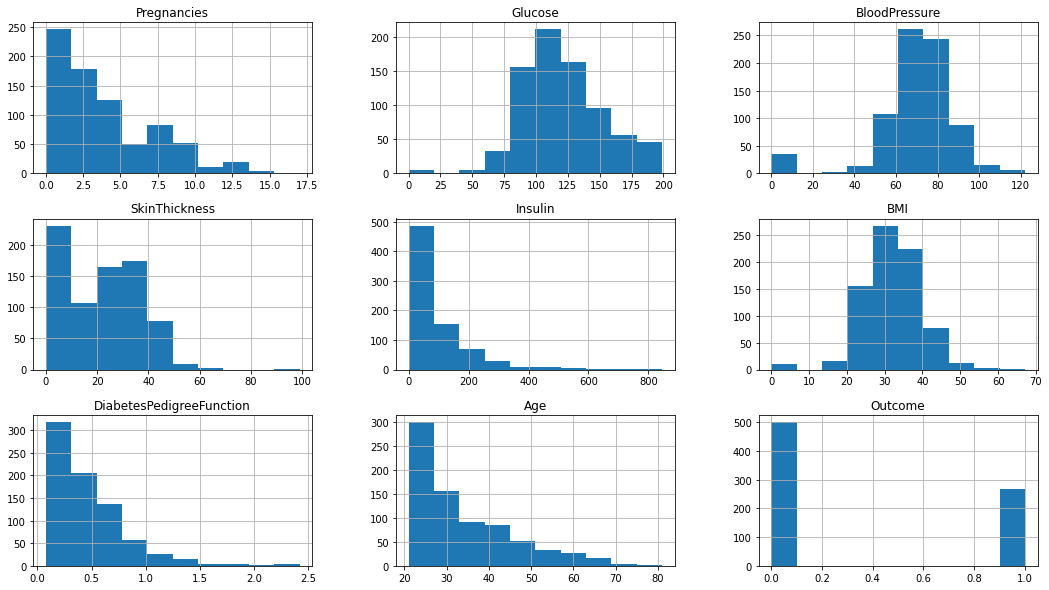

In [120]:
# Using histogram to understand distribution of data
p = diabetes_dataset.hist(figsize = (18, 10))

Fixing NaN Values in the dataset

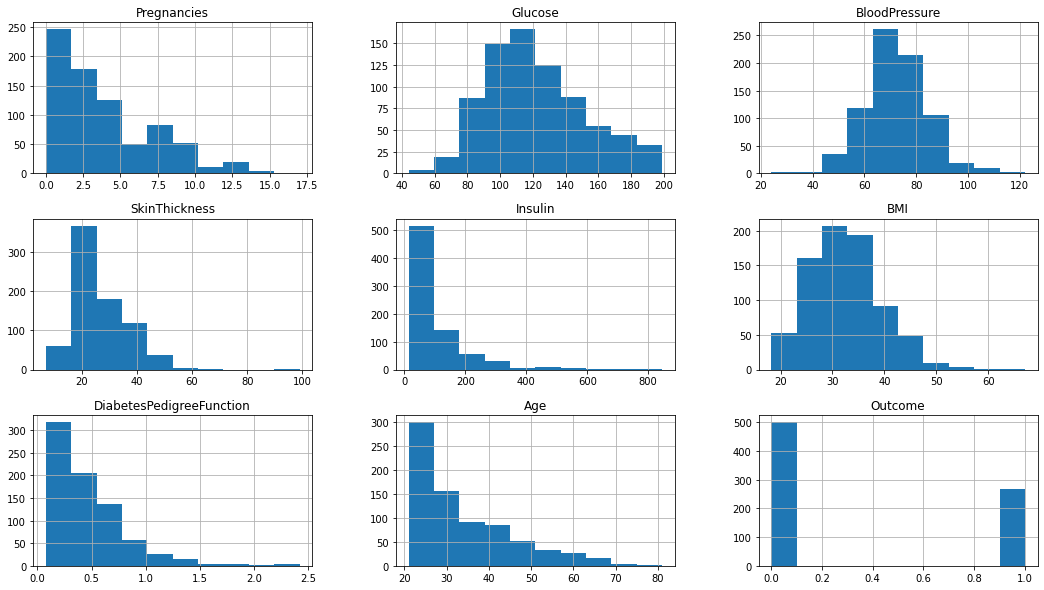

In [121]:
# Filling NaN values according to above graph of respective attribute
diabetes_dataset_copy['Glucose'].fillna(diabetes_dataset['Glucose'].mean(), inplace = True)
diabetes_dataset_copy['BloodPressure'].fillna(diabetes_dataset['BloodPressure'].mean(), inplace = True)
diabetes_dataset_copy['SkinThickness'].fillna(diabetes_dataset['SkinThickness'].median(), inplace = True)
diabetes_dataset_copy['Insulin'].fillna(diabetes_dataset['Insulin'].median(), inplace = True)
diabetes_dataset_copy['BMI'].fillna(diabetes_dataset['BMI'].median(), inplace = True)
p = diabetes_dataset_copy.hist(figsize = (18, 10))

0    500
1    268
Name: Outcome, dtype: int64


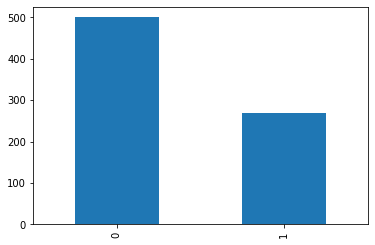

In [122]:
# Checking number of positive and negative outcomes
print(diabetes_dataset.Outcome.value_counts())
plot = diabetes_dataset.Outcome.value_counts().plot(kind = 'bar')

The number of non-diabetic patient is twice the number of diabetic patient thus from above graph it is clear that dataset is biased towards having outcome negative.

Heatmap for uncleaned data

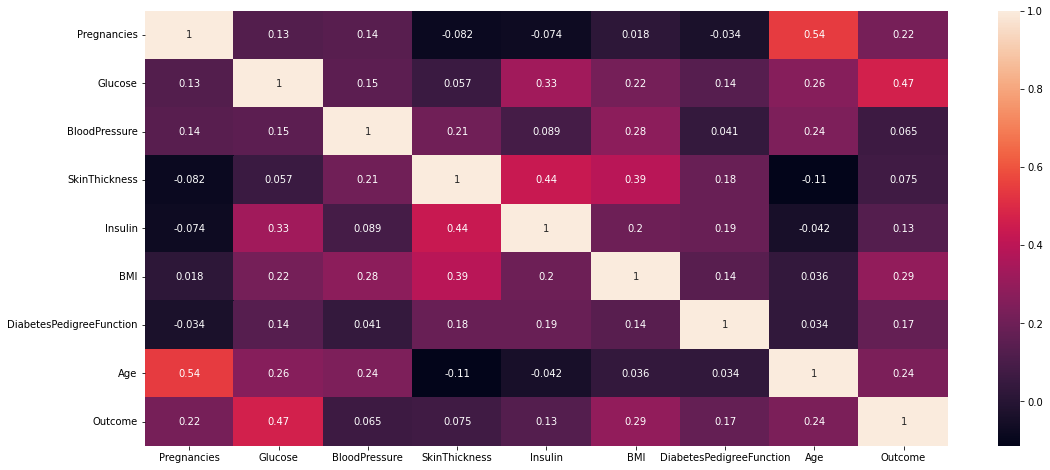

In [123]:
plt.figure(figsize = (18, 8))
plot = sns.heatmap(diabetes_dataset.corr(), annot = True)

Heatmap for cleaned Data

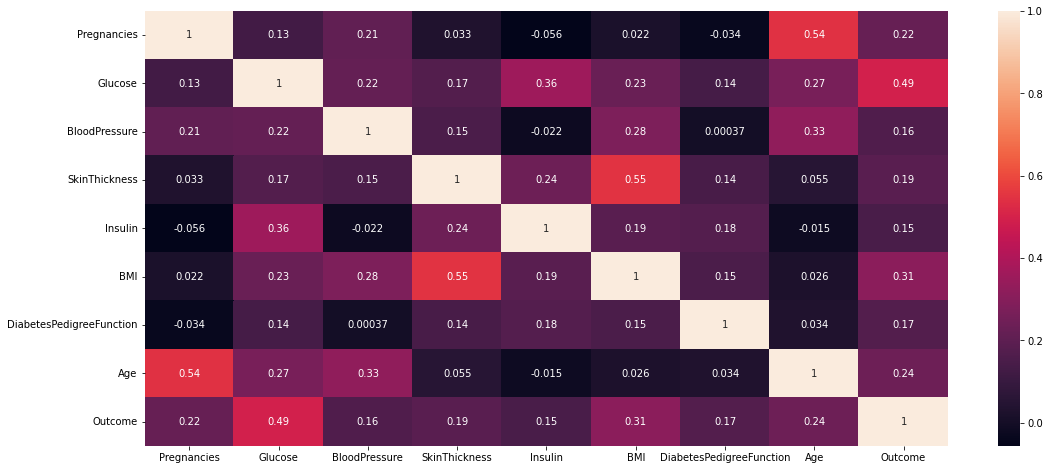

In [124]:
plt.figure(figsize = (18, 8))
plot = sns.heatmap(diabetes_dataset_copy.corr(), annot = True)

Scaling the Data

In [125]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(diabetes_dataset_copy.drop(["Outcome"],axis = 1)), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549885,5.484909,-0.020496


In [126]:
y = diabetes_dataset_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Splitting Dataset into Training set and Testing set

In [127]:
#Using train_test_split form sklearn to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 7, stratify = y)
X_train, X_test, y_train, y_test

(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 747    -0.844885 -1.337498       0.144135       1.481661 -0.356966  2.015618   
 440    -1.141852  2.213242       2.621827      -0.253132 -0.608201  0.269119   
 755    -0.844885  0.207731       1.300391       1.264812  0.145505  0.589311   
 200    -1.141852 -0.285427       0.639674      -1.228953 -0.608201 -0.211168   
 484    -1.141852  0.766644      -0.260103      -0.469981 -0.608201  1.709981   
 ..           ...       ...            ...            ...       ...       ...   
 107     0.046014  0.733767      -1.177301       0.072142  0.429922 -0.429480   
 424     1.233880  0.963907       0.474494       0.505840  1.093562  1.520777   
 425     0.046014  2.048856       0.474494       1.264812  1.728760  0.662082   
 153    -0.844885  1.029662       0.804853       1.590085  3.700719  1.186031   
 202    -1.141852 -0.449813      -0.351403      -0.795255 -0.608201 -0.749672   
 
      DiabetesPedigreeFunc

Training the Model

In [128]:
test_scores = []
train_scores = []

for i in range(1, 20):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

max_train_score = max(train_scores)
max_train_score_idx = [i for i, score in enumerate(train_scores) if score == max_train_score]
print('Max Train Score-',  max_train_score*100, ' for k = ', max_train_score_idx[0]+1)

max_test_score = max(test_scores)
max_test_score_idx = [i for i, score in enumerate(test_scores) if score == max_test_score]
print('Max test Score-',  max_test_score*100, ' for k = ', max_test_score_idx[0]+1)


Max Train Score- 100.0  for k =  1
Max test Score- 80.20833333333334  for k =  15


Plotting the Train and Test Scores

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


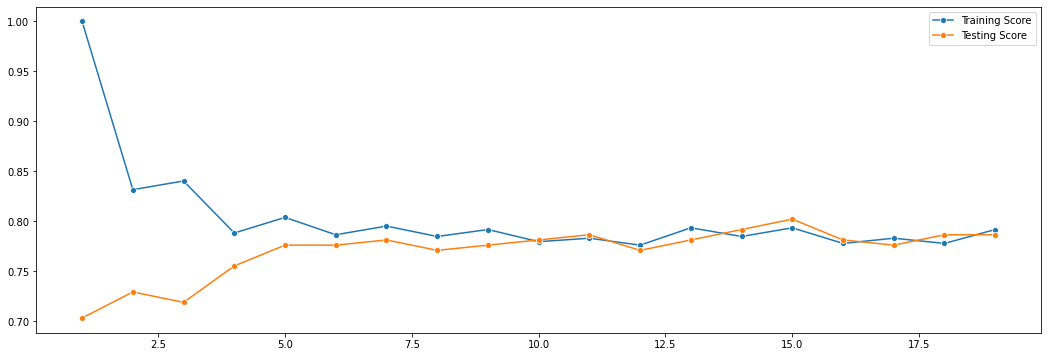

In [129]:
plt.figure(figsize = (18, 6))
plot = sns.lineplot(range(1, 20), train_scores, marker = 'o', label = 'Training Score')
plot = sns.lineplot(range(1, 20), test_scores, marker = 'o', label = 'Testing Score')

Upon analyzong the above graph, Test set gives best result on k = 15. But the line graph of test and training data meets as early as k = 10
So to avoid Overfitting k = 10 is chosen for final model

In [130]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.78125

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:239: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:311: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,


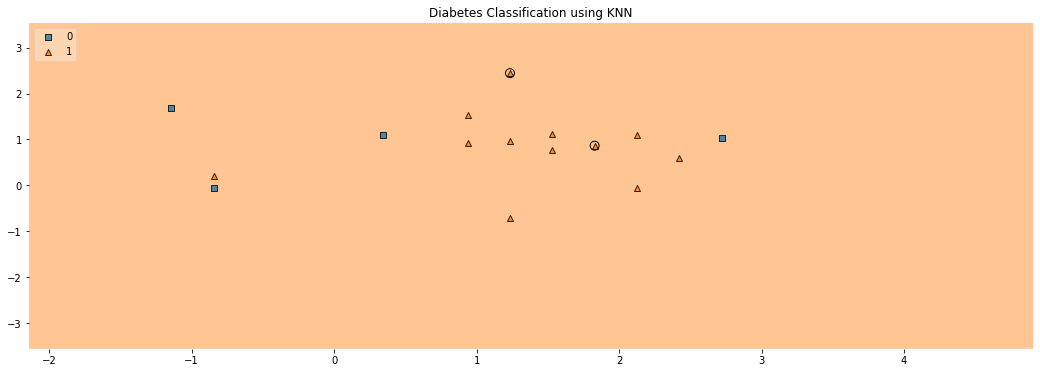

In [131]:
plt.figure(figsize = (18, 6))
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf = knn, legend = 2,
                      filler_feature_values = {2: value, 3: value, 4: value, 5: value, 6: value, 7: value}, 
                      filler_feature_ranges = {2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight = X_test.values)
plt.title('Diabetes Classification using KNN')
plt.show()

#### Model Performance Analysis
Confusion Matrix

Text(33.0, 0.5, 'Actual')

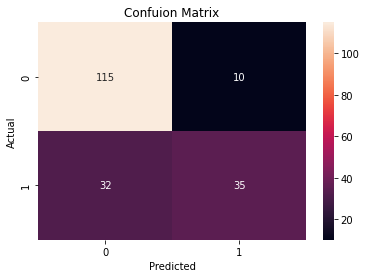

In [132]:
y_pred = knn.predict(X_test)
cnf_mtx = confusion_matrix(y_test, y_pred)
plot = sns.heatmap(pd.DataFrame(cnf_mtx), annot = True, fmt = 'g')
plt.title('Confuion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Classification Report

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       125
           1       0.78      0.52      0.62        67

    accuracy                           0.78       192
   macro avg       0.78      0.72      0.74       192
weighted avg       0.78      0.78      0.77       192



ROC Curve


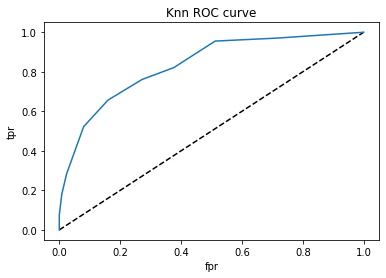

In [134]:
y_pred_probablity = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probablity)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn ROC curve')
plt.show()

####Hyper Parameter Optimization
Using GridSearchCV

In [135]:
params = {'n_neighbors': np.arange(1, 100)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, params, cv = 5)
knn_gscv.fit(X, y)
print('Best Model Score- ', knn_gscv.best_score_ )
print('Best Params- ', knn_gscv.best_params_)

Best Model Score-  0.7774127832951361
Best Params-  {'n_neighbors': 27}


####Saving the Model

In [136]:
final_model = KNeighborsClassifier(27)
final_model.fit(X, y)
pickle.dump(final_model, open('diabetes_model.sav', 'wb'))

In [137]:
model = pickle.load(open('diabetes_model.sav', 'rb'))
model.score(X, y)

0.7942708333333334